In [1]:
%load_ext autoreload
%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import clipboard
import numpy as np
from IPython.display import clear_output
sys.path.append('/Users/orenm/BlenderShaderProject/project_files/')

In [2]:
%autoreload 2
from Logic.network_manager import NetworkManager
from Logic.meta_network import MetaNetworkManager
from Logic.generation_db_and_manager import *
from Logic.variations_creator import *
from Logic.bpy_connector import generate_image
from Logic.utils import compare_dicts, deep_unfreeze, show_image_grid

In [3]:
path = '/Users/orenm/BlenderShaderProject/data/'
images_path = os.path.join(path, 'images/')
db_path = os.path.join(path, 'DB/')

In [5]:
# db_manager = DBManager(db_path)

In [5]:
db_manager = DBManager.load(db_path)

In [ ]:
for i in range(100):  # mega nodes
    clear_output(wait=True)
    print(f'mega nodes :{i}')
    
    n_change_params = np.random.randint(3, 6)
    kwargs = {'max_layers': 1, 'n_additions': 1, 'n_change_params': n_change_params}
    concat_param_change = np.random.rand() < 0.3
    make_cluster(db_manager, mega_nodes, concat_param_change=concat_param_change, cluster_kwargs=kwargs)

for i in range(500):  # regular meta nodes
    clear_output(wait=True)
    print(f'regular meta nodes :{i}')
    
    max_layers = np.random.randint(1, 2)
    n_additions = np.random.randint(2, 3)
    n_change_params = np.random.randint(3, 6)
    kwargs = {'max_layers': max_layers, 'n_additions': n_additions, 'n_change_params': n_change_params}
    concat_param_change = np.random.rand() < 0.3
    make_cluster(db_manager, regular_meta_nodes, concat_param_change=concat_param_change, cluster_kwargs=kwargs)

for i in range(400):  # random nodes
    clear_output(wait=True)
    print(f'random nodes :{i}')
    
    n_additions = np.random.randint(3, 8)
    n_change_params = np.random.randint(4, 12)
    kwargs = {'n_additions': n_additions, 'n_change_params': n_change_params}
    concat_param_change = np.random.rand() < 0.3
    make_cluster(db_manager, completely_random_generation, concat_param_change=concat_param_change, cluster_kwargs=kwargs)

random nodes :346
Info: Deleted 3 data-block(s)


In [ ]:
len(db_manager.network)

In [ ]:
def get_legit_labels(db_manager):
    if np.random.rand() < 0.65:
        return db_manager.get_nodes_without_label(IS_EMPTY_NETWORK)
    return db_manager.get_nodes_with_label(IS_CLUSTER_BASE)

for i in range(5000):
    selected_variation_func = change_numeric
    
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    make_variations(db_manager, selected_node, selected_variation_func)

for i in range(5000):
    selected_variation_func = change_params
    
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    make_variations(db_manager, selected_node, selected_variation_func)

for i in range(1500):
    structural_changes = [add_random_node_on_edge, add_random_edge, remove_random_edge, remove_random_node]
    selected_variation_func = np.random.choice(structural_changes)
    
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    make_variations(db_manager, selected_node, selected_variation_func)

for i in range(10000):
    selected_variation_func = change_seed
    
    legit_nodes = get_legit_labels(db_manager)
    selected_node = np.random.choice(legit_nodes)
    make_variations(db_manager, selected_node, selected_variation_func)

In [ ]:
len(db_manager.network)

In [ ]:
failed = db_manager.generate_images(images_path)

In [6]:
# db_manager.draw_network()

In [ ]:
len(db_manager.get_nodes_with_label(IS_CLUSTER_BASE))

In [ ]:
len(db_manager.get_nodes_with_label(IS_EMPTY_NETWORK))

In [ ]:
len(db_manager.get_nodes_with_label(IS_EMPTY_IMAGE))

In [ ]:
db_manager.save()

# Images investigation

In [323]:
relevant_nodes = db_manager.get_nodes_without_label(IS_EMPTY_NETWORK)
# relevant_nodes = db_manager.get_nodes_with_label(IS_EMPTY_IMAGE)
len(relevant_nodes)

1210

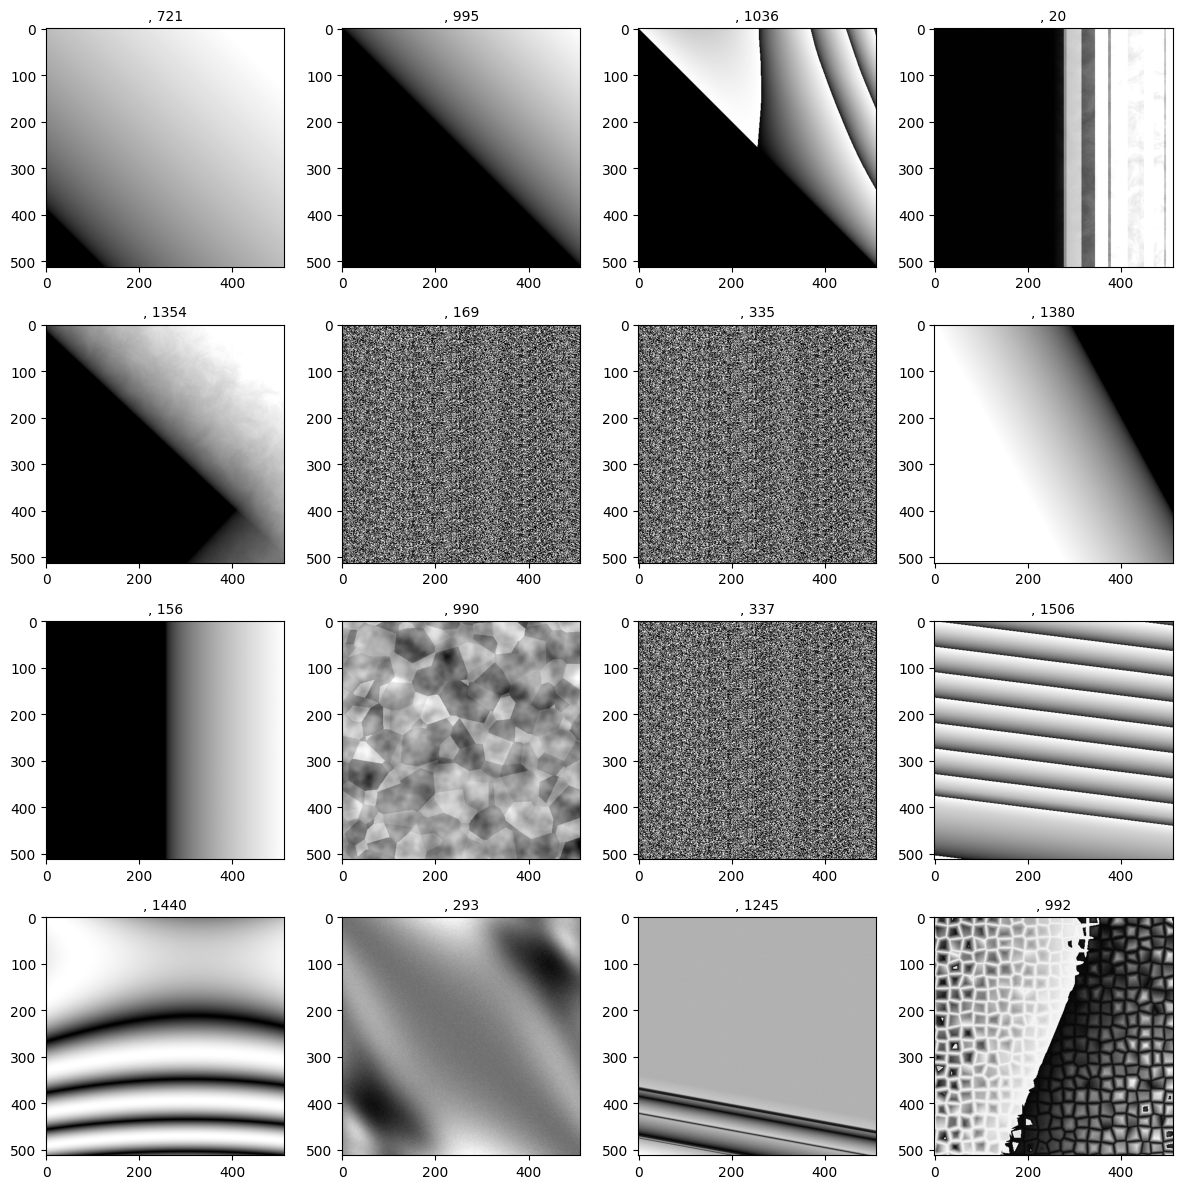

In [335]:
nodes_to_show = np.random.choice(relevant_nodes, min(16, len(relevant_nodes)), replace=False)

# nodes_data = [(node_id, [x for x in db_manager.network.nodes[node_id]['labels'] if 'generation' in x][0]) for node_id in nodes_to_show]
nodes_data = [(node_id, '') for node_id in nodes_to_show]

img_paths = [(os.path.join(images_path, f"{node_id}.png"), f'{text}, {node_id}') for node_id, text in nodes_data]

show_image_grid(img_paths)

In [21]:
# by a single node - show variations on it

In [279]:
# SEED, NUMERIC, CAT_AND_NUMERIC
edge_show = 'CAT_AND_NUMERIC'

In [280]:
cluster_bases = db_manager.get_nodes_with_label(IS_CLUSTER_BASE)
cluster_bases = db_manager.get_nodes_with_edge_type(edge_show)

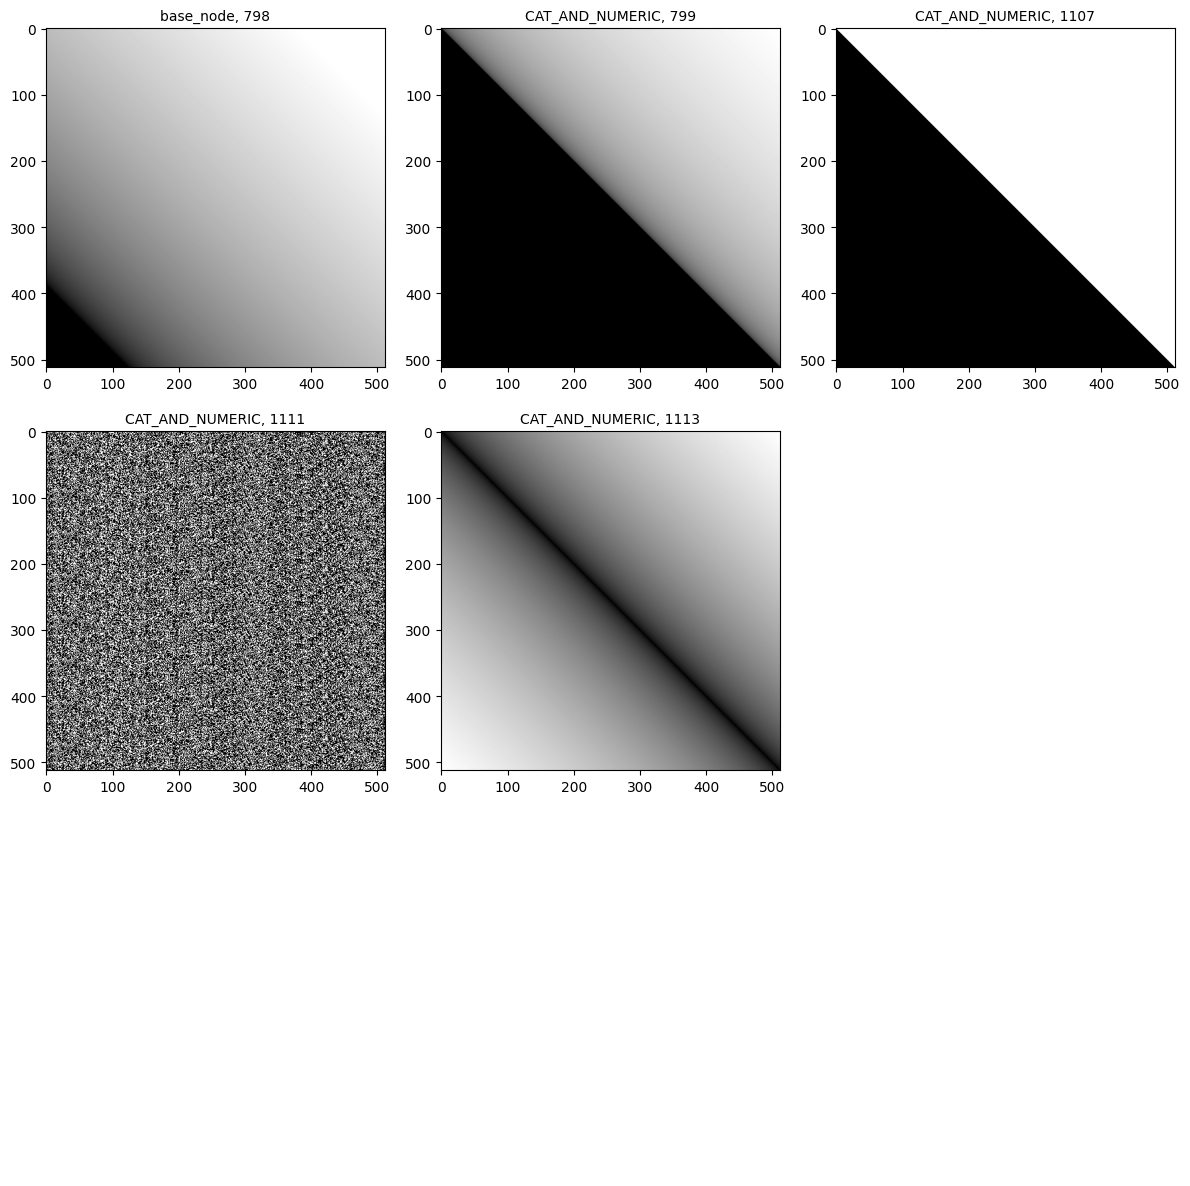

In [284]:
base_node = np.random.choice(cluster_bases)
connected_nodes = db_manager.network.edges(base_node, data=True)

connected_nodes = [x for x in connected_nodes if x[2]['variation_type'] == edge_show]

nodes_data = [(base_node, 'base_node')]
nodes_data.extend([(node_id, d['variation_type']) for _, node_id, d in connected_nodes])
img_paths = [(os.path.join(images_path, f"{node_id}.png"), f'{text}, {node_id}') for node_id, text in nodes_data]

show_image_grid(img_paths)

In [277]:
nm1 = db_manager.network_managers['1050']
nm2 = db_manager.network_managers['1051']

In [278]:
NetworkManager.find_nodes_differences(nm1, nm2)

defaultdict(dict,
            {'Math_1': {'value_0': (0, 1.8),
              'value_1': (0, 5.0),
              'operation': ('ADD', 'ABSOLUTE')}})

In [227]:
code = nm1.generate_code(with_initialization_code=True)
clipboard.copy(code)

# tests that db manager works

In [7]:
for i in range(40):
    clear_output()
    some_node = np.random.choice(list(db_manager.network_managers))
    
    current_node = some_node
    
    orig_copy = db_manager.network_managers[some_node].copy()
    for _ in range(40):
        print(current_node)
        # Get incoming edges for the current node
        outgoing_edges = list(db_manager.network.out_edges(current_node, data=True))
        # Pick a random incoming edge
        edge = outgoing_edges[np.random.randint(len(outgoing_edges))]
        # Move to the new node
        current_node = edge[1]  # The source of the edge becomes the new node
        nm_after =  db_manager.network_managers[current_node]
        variation = VariationDescriptor(VariationType[edge[2]['variation_type']], edge[2]['step'])
        apply_variation(orig_copy, variation)
        assert NetworkManager.compare_networks(orig_copy, nm_after, tuple_list_hack=True)

569
1059
1146
1059
1308
1059
569
570
571
1236
571
572
1088
572
1088
572
1088
572
1088
572
573
574
562
563
564
565
1150
565
566
567
568
569
1059
1308
1059
569
570
571
572
1088


In [8]:
db_manager.save()
new_db = DBManager.load(db_path)
assert db_manager.network.nodes(data=True) == new_db.network.nodes(data=True)
a = list(db_manager.network.edges(data=True))
b = list(new_db.network.edges(data=True))
assert compare_dicts(a, b)